In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.



  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


In [2]:
width = 28
height = 28

In [3]:
# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

11493376/11490434 [==============================] - 11s 1us/step


In [4]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 332,801
Trainable params: 332,801
Non-trainable params: 0
_________________________________________________________________


In [5]:

# 3. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s 96us/step - loss: 0.2789 - acc: 0.8890 - val_loss: 0.1403 - val_acc: 0.9512
Epoch 2/30
50000/50000 [==============================] - 5s 90us/step - loss: 0.1202 - acc: 0.9580 - val_loss: 0.0981 - val_acc: 0.9688
Epoch 3/30
50000/50000 [==============================] - 4s 90us/step - loss: 0.0886 - acc: 0.9690 - val_loss: 0.0804 - val_acc: 0.9740
Epoch 4/30
50000/50000 [==============================] - 5s 91us/step - loss: 0.0727 - acc: 0.9744 - val_loss: 0.0722 - val_acc: 0.9755
Epoch 5/30
50000/50000 [==============================] - 5s 92us/step - loss: 0.0624 - acc: 0.9783 - val_loss: 0.0794 - val_acc: 0.9745
Epoch 6/30
50000/50000 [==============================] - 5s 90us/step - loss: 0.0543 - acc: 0.9806 - val_loss: 0.0640 - val_acc: 0.9780
Epoch 7/30
50000/50000 [=========

In [ ]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

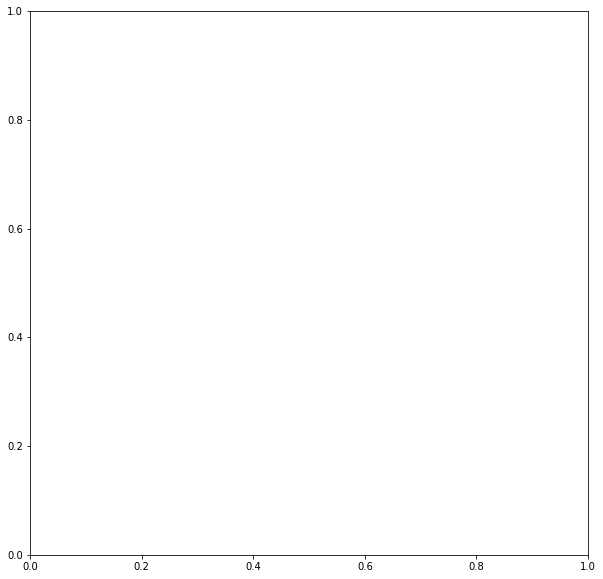

In [10]:
fig, loss_ax = plt.subplots()
loss_ax

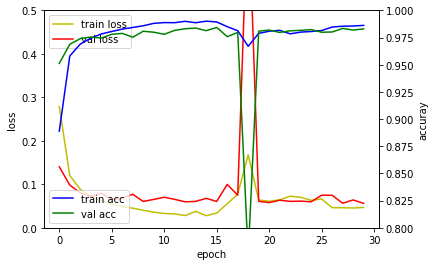

In [6]:
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [7]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 0s 22us/step
## evaluation loss and_metrics ##
[0.048330523877451195, 0.9836]


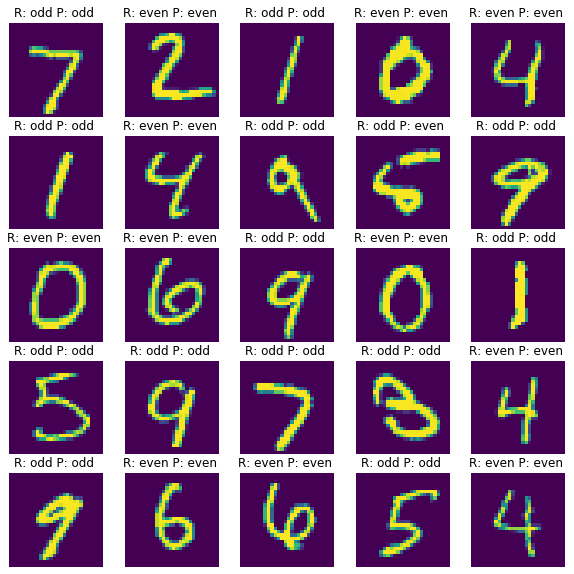

In [9]:


# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[int(i/plt_row), int(i%plt_col)]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '

    sub_plt_title += 'P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '        
    
    sub_plt.set_title(sub_plt_title)

plt.show()